### Kerasを用いたニューラルネットワークの構築

In [ ]:
'''
1. データセットの読み込みと前処理
'''
# Fashion-MNISTデータセットをインポート
from tensorflow.keras.datasets import fashion_mnist

# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# (28, 28)の画像データを（784）のベクトルに変換して正規化を行う
# (60000, 28, 28)の訓練データを(60000, 784)の2階テンソルに変換
x_train = x_train.reshape(-1, 784)
# 訓練データをfloat32（浮動小数点）型に255で割ってスケール変換する
x_train = x_train.astype('float32') / 255

# (10000, 28, 28)の訓練データを(10000, 784)の2階テンソルに変換
x_test = x_test.reshape(-1, 784)
# テストデータをfloat32（浮動小数点）型に255で割ってスケール変換する
x_test = x_test.astype('float32') / 255

In [ ]:
'''
2. モデルの定義
'''
# ニューラルネットワークの構築
# keras.modelからSequentislをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDense, Dropoutをインポート
from tensorflow.keras.layers import Dense, Dropout
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

# 隠れ層
model = Sequential()
model.add(Dense(
    256,
    input_dim=784,
    activation='relu'
))
# ドロップアウト
model.add(Dropout(0.5))

model.add(Dense(
    10,
    activation='softmax'
))

# モデルのコンパイル
learning_rate = 0.1
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(lr=learning_rate),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
%%time
'''
3. 学習を行う
'''
from tensorflow.keras.callbacks import EarlyStopping

# 学習回数、ミニバッチのサイズを設定
training_epochs = 100
batch_size = 64

# 早期終了を行うEarlyStoppingを生成
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

# 学習を行って結果を出力
history = model.fit(
    x_train,
    y_train,
    epochs=training_epochs,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stopping]
)
# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの誤り率を出力
print('Test loss:', score[0])
# テストデータの正解率を出力
print('Test accuracy:', score[1])

Epoch 1/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6769 - accuracy: 0.7627 - val_loss: 0.4778 - val_accuracy: 0.8274
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4964 - accuracy: 0.8217 - val_loss: 0.4160 - val_accuracy: 0.8513
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4486 - accuracy: 0.8393 - val_loss: 0.3946 - val_accuracy: 0.8587
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4251 - accuracy: 0.8477 - val_loss: 0.3924 - val_accuracy: 0.8582
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4051 - accuracy: 0.8530 - val_loss: 0.3684 - val_accuracy: 0.8668
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3921 - accuracy: 0.8581 - val_loss: 0.3599 - val_accuracy: 0.8708
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3802 - accuracy: 0.8620 - val_loss: 0.3504 - val_accuracy: 0.8761

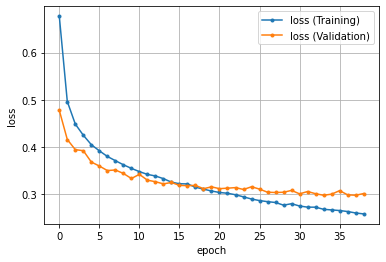

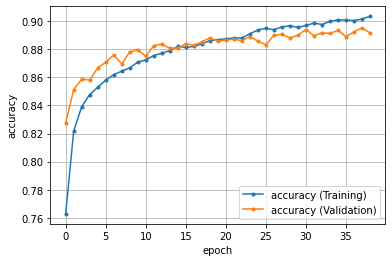

In [ ]:
'''
4. 損失、正解率をグラフにする
'''
%matplotlib inline
import matplotlib.pyplot as plt

# 訓練データの損失をプロット
plt.plot(
    history.history['loss'],
    marker='.',
    label='loss (Training)'
)
# 検証データの損失をプロット
plt.plot(
    history.history['val_loss'],
    marker='.',
    label='loss (Validation)'
)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 訓練データの精度をプロット
plt.plot(
    history.history['accuracy'],
    marker='.',
    label='accuracy (Training)'
)
# 検証データの精度をプロット
plt.plot(
    history.history['val_accuracy'],
    marker='.',
    label='accuracy (Validation)'
)
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()